In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
%matplotlib inline

# Naive Bayes

In [47]:
# Load data.
data = load_iris()
df = sns.load_dataset('iris')


In [30]:
# Display the description.
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [31]:
# Explanatory variables.
X = data['data']
columns = list(data['feature_names'])
print(columns)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [32]:
# Response variable.
from collections import Counter

Y = data['target']
labels = list(data['target_names'])
print(labels)


['setosa', 'versicolor', 'virginica']


visualize the frequency table  of the labels using barplot

<AxesSubplot:>

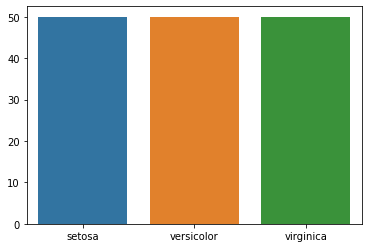

In [33]:
sns.barplot(x= labels , y = list(Counter(Y).values()))

plot a pairplot of your dataset , and use the class values in hue to label your scatter points

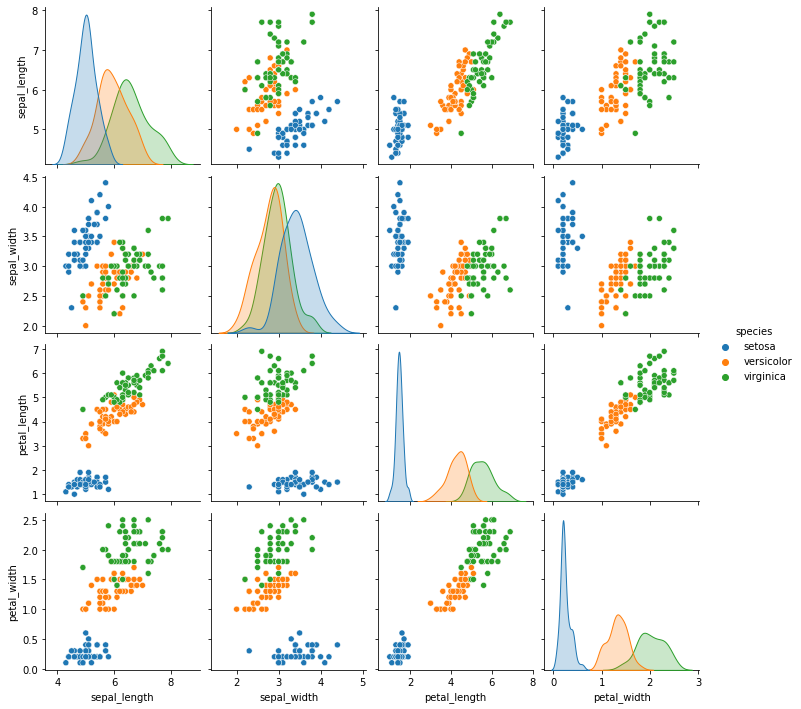

In [34]:
sns.pairplot(df, hue="species")

split your dataset to train and test set  **(set test_size to 30% )**

In [35]:

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3,random_state=10)

fit a GaussianNB on train set and make prediction on testset

In [36]:
# Train and predict.
model = GaussianNB()
model.fit(x_train, y_train)
y_pred=model.predict(x_test)

use the previous result and plot the confusion matrix

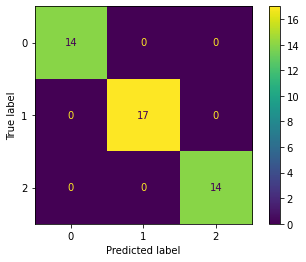

In [37]:
#https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model ,x_test, y_test)

calculate the accuracy using sklearn

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

1.0

visualize the parameters of the GuassianNB after training , store theta in ``centers`` and sigma in ``variances``  

In [39]:
centers = model.theta_
variances = model.sigma_


In [40]:
print(" centers : " , centers)
print(" variances : " , variances)

 centers :  [[5.04722222 3.48055556 1.46388889 0.23611111]
 [5.94848485 2.76666667 4.20909091 1.31818182]
 [6.54166667 2.98333333 5.53888889 2.00555556]]
 variances :  [[0.13638118 0.13434414 0.03008488 0.00952932]
 [0.28249771 0.08343435 0.26022039 0.04269973]
 [0.411875   0.10083334 0.2779321  0.08219136]]


complete this code to reproduce the plot below 

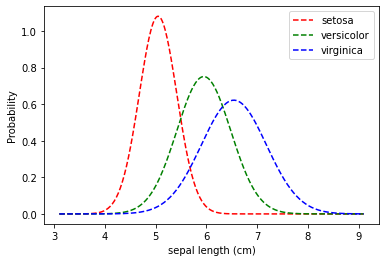

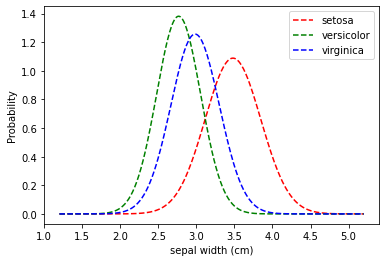

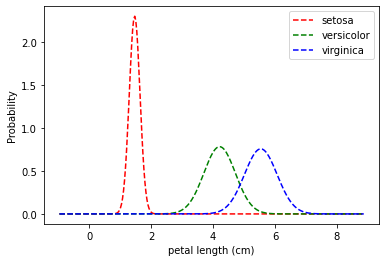

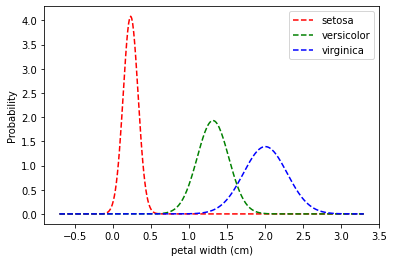

300

In [46]:

my_cols_dict = {0:'red', 1:'green', 2:'blue'}

for i in range(4):
    x_min = X[:,i].min()
    x_max = X[:,i].max()
    x_range = x_max-x_min
    x_grid = np.linspace(x_min-x_range/3,x_max+x_range/3,300)
    fig, ax = plt.subplots()
    ax.set_xlabel(columns[i])
    ax.set_ylabel('Probability')
    ###############################
    for m in range(3) : 
        plt.plot( x_grid,st.norm.pdf(x_grid,loc=(centers[m,i]) ,scale= (np.sqrt(variances[m,i])) ), '--'  ,label = labels[m] , color = my_cols_dict[m] )
    ax.legend(loc=0)

    plt.show()   

len(x_grid)